# Portfolio Assignment week 02

This week's focus is on manifold learning and text clustering. As part of the portfolio assignment, you are required to make a contribution to either the manifold learning case or the text clustering case. There are several options for your contribution, so you can choose the one that aligns with your learning style or interests the most

### Manifold learning

Study the Tutorial tutorial_manifold_tSNE and the tutorial_manifold_spectral_clustering and the Study_Case_pipeline. Next improve the code by comparing the performance of k-means and spectral clustering. Also compare PCA and t-SNE in the visualization of the result. You can use the pipeline function of scikit-learn and hyperparameter tuning with GridSearchCV. Here's a possible approach:

- Load the dataset to be used for the clustering analysis.
- Preprocess the dataset as needed (e.g., scale the features, normalize the data, etc.).
- Define a pipeline with preprocessing and clustering
- use PCA and t-SNE for dimension reduction and visualize the dimensions, use the clusters to color the datapoints
- use GridSearchCV to optimize the hyper parameters
- Evaluate the performance of the models using a suitable metric
- choose the best cluster method and the best visualization method combination

In [181]:
import yaml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
# Loading dataset
def get_config():
    with open("config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config

In [114]:
def load_data(x):
    config = get_config()
    data = (config[x])
    df = pd.read_csv(data)
    return df

In [178]:
def explore_data(df):
    print(f'Dataframe dimensions: {df.shape}')
    datatypes = df['type'].value_counts()
    print(df['type'].value_counts())
    print(df.head())

In [172]:
def plot_density(df):
    # Get mean
    mean = df.iloc[:,2:].mean()
    mean_df = pd.DataFrame({'mean':mean})
    
    # Setting plot parameters
    sns.set(style="darkgrid")
    # Denstiy plot
    sns.kdeplot(mean_df['mean'], shade=True, color='olive')
    plt.tight_layout()
    plt.show()

In [229]:
def dimension_reduction(df):
    df['samples'] = df['samples'].apply(str)
    data = df.select_dtypes(include=np.number)
    
    # Normalize
    sc = StandardScaler()
    X = sc.fit_transform(data)
    
    # t-SNE
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state = 42)
    X_embedded = X_embedded.fit_transform(X)
    
    # PCA
    pca = PCA(n_components=50)
    pc = pca.fit_transform(X)
    
    # Set plot parameters
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot t-SNE
    df['x'] = X_embedded[:, 0]
    df['y'] = X_embedded[:, 1]
    sns.scatterplot(x='x', y='y', hue='type', data=df, alpha=0.5, palette=['red', 'blue'], ax=axes[0])
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    axes[0].set_title('t-SNE')

    # Plot PCA
    df['pc1'] = pc[:, 0]
    df['pc2'] = pc[:, 1]
    sns.scatterplot(x='pc1', y='pc2', hue='type', data=df, alpha=0.5, palette=['red', 'blue'], ax=axes[1])
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    axes[1].set_title('PCA')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()

In [121]:
df = load_data('colorectal-cancer')

In [179]:
explore_data(df)

Dataframe dimensions: (194, 49388)
normal            97
adenocarcinoma    97
Name: type, dtype: int64


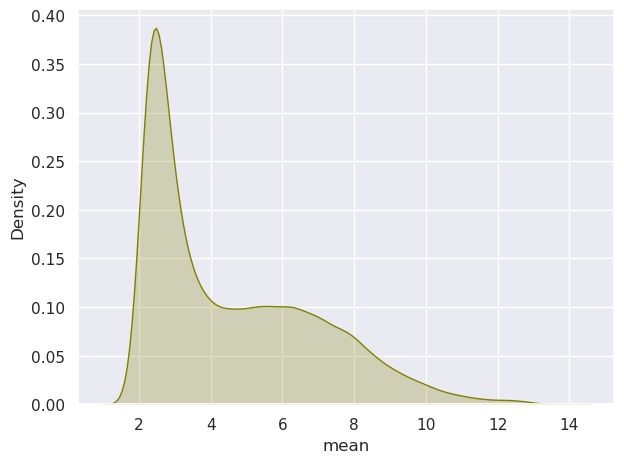

In [174]:
plot_density(df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


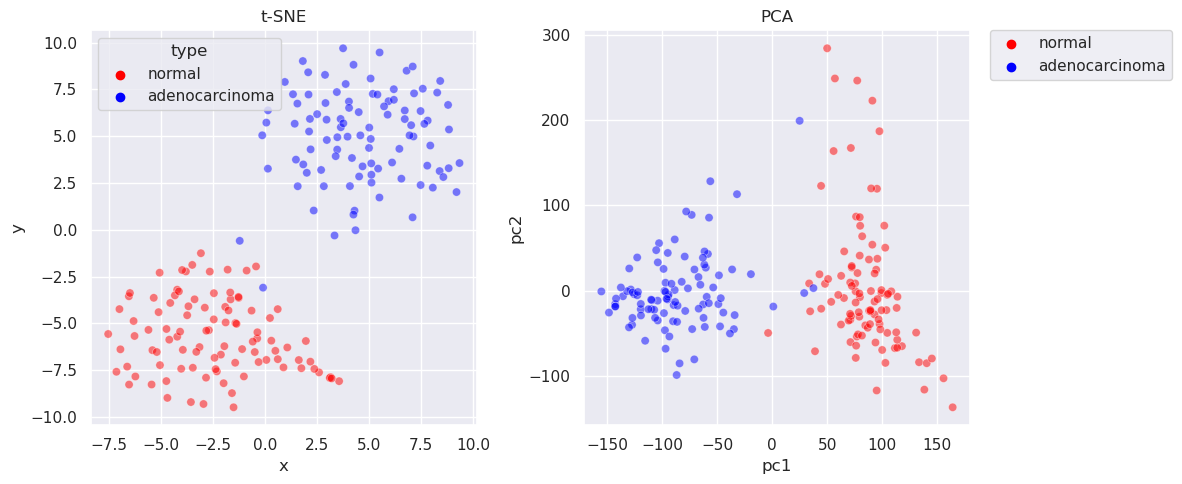

In [230]:
dimension_reduction(df)

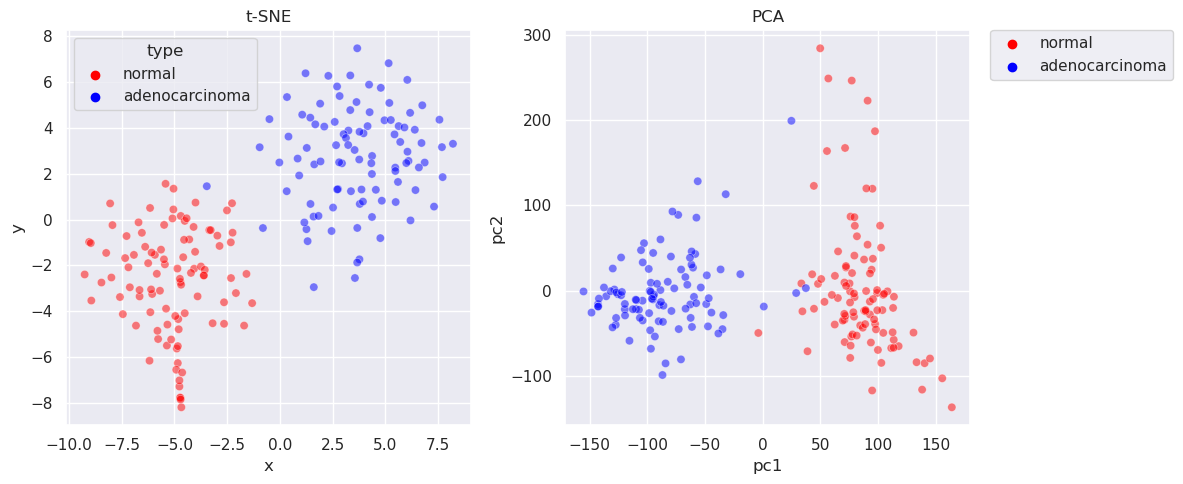

In [228]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state = 42)
X_embedded = X_embedded.fit_transform(pc)

# Set plot parameters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot t-SNE
df['x'] = X_embedded[:, 0]
df['y'] = X_embedded[:, 1]
sns.scatterplot(x='x', y='y', hue='type', data=df, alpha=0.5, palette=['red', 'blue'], ax=axes[0])
axes[0].set_title('t-SNE')

# Plot PCA
df['pc1'] = pc[:, 0]
df['pc2'] = pc[:, 1]
sns.scatterplot(x='pc1', y='pc2', hue='type', data=df, alpha=0.5, palette=['red', 'blue'], ax=axes[1])
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axes[1].set_title('PCA')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()